In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Первая задача

На примере уравнения $$\sin^2 x\ e^{x} = 3x - 1$$ провести сравнительный анализ следующих методов решения нелинейных уравнений:

1. метод простой итерации;

2. метод Ньютона;

3. метод секущих;

4. метод Чебышева третьего порядка.

Решение поставленной задачи будет состоять из двух этапов:

1. отделение корней;

2. отыскание приближенного решения.

## Отделение корней

Пусть задана функция $f(x)$ действительного переменного $x \in \mathbb{R}$. Требуется найти корни уравнения $$f(x) = 0,$$
или, что то же самое, нули функции $f(x)$. 

**Теорема**. *Если функция $f(x)$ непрерывна на отрезке $[a,b]$ и принимает на его концах значения разных знаков, то на этом отрезке существует по крайней мере один корень уравнения $f(x) = 0$.
Если при этом функция $f(x)$ будет монотонной на отрезке $[a,b]$, то она может иметь только один корень.*

Приведем функцию к виду $f(x) = 0$: $$e^x\sin^2x - 3x + 1 = 0.$$
Следуя теореме, необходимо выбрать такой отрезок $[a,b]$, на котором функция будет иметь только один корень.

In [2]:
def f(x):
    return np.e**x * (np.sin(x))**2 - 3*x + 1

Графически изобразим функцию $f(x)$, чтобы найти отрезки, на которых она имеет только один корень.

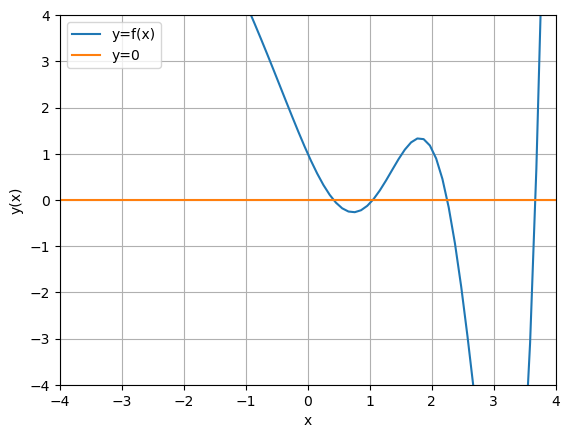

In [3]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='y=f(x)')
ax.plot(x, 0*x, label='y=0')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Как можно видеть на отрезке $[0;1]$ наша функция имеет не более двух нулей. Причем не совсем ясно, лежит ли правый ноль в этом отрезке или нет. Сделаем несколько шагов дихотомии для того, чтобы сузить отрезок до такой степени, чтобы там гарантировано находился единственный корень функции.

In [4]:
a = 0
b = 1
eps = 1e-1

table_list = [[a, b, b - a, f(a), f(b) , (a + b)/2]]
c = 0
while b - a > eps:
    c = (a+b)/2
    if f(c)*f(a) >= 0:
        a = c
    else:
        b = c
    table_list.append([a, b, b - a, f(a), f(b) , (a + b)/2])

In [5]:
pd.DataFrame(table_list, columns = ['a', 'b', 'b-a', 'f(a)', 'f(b)', '(a+b)/2'])

,a,b,b-a,f(a),f(b),(a+b)/2
0,0.000,1.0000,1.0000,1.000000,-0.075257,0.50000
1,0.000,0.5000,0.5000,1.000000,-0.121043,0.25000
2,0.250,0.5000,0.2500,0.328594,-0.121043,0.37500
3,0.375,0.5000,0.1250,0.070195,-0.121043,0.43750
4,0.375,0.4375,0.0625,0.070195,-0.034483,0.40625


Таким образом, мы имеем отрезок $[0.375; 0.4375]$, на котором существует по крайней мере один корень уравнения. Проверим, является ли этот корень единственным, исследовав функцию на монотонность на этом отрезке. Для этого рассмотрим поведение производной (она должна не менять знак).

In [6]:
def f_(x):
    return np.e**x*((np.sin(x))**2 + np.sin(2*x)) - 3

Рассмотрим значение производной на левом конце отрезка

In [7]:
f_(a)

-1.8130262601775078

Значение отрицательно. Теперь выясним, не превосходит ли нуля функция на этом отрезке:
$$f'(x) = e^x (\sin ^2 x + \sin2x) - 3.$$
На этом отрезке функция $e^x$ является положительно возрастающей, $\sin^2 x$ положительно возрастающей и $\sin 2x$ положительно возрастающей. То есть производная функции является комбинацией положительно возрастающих функций. Значит нам достаточно того, чтобы она и на правом конце отрезка также принимала отрицательное значение.

In [8]:
f_(b)

-1.5331878965263412

В итоге производная функции не меняет знак, значит исходная функция на этом отрезке монотонно убывает.

**Вывод**. На этпае отделения корней мы получили отрезок $[0.375; 0.4375]$, на котором мы имеем единственный корень уравнения. Приближенное значение этого корня мы и будем вычислять. Причем в качестве начального приближения лучше всего брать середину отрезка, то есть $x_0 = 0.0625$.

## Отыскание приближенного решения

Зададим для всех методов точность $\varepsilon = 10^{-8}$ и условие остановки итерационного процесса $$|x^{k+1} - x^k| < \varepsilon.$$

In [9]:
epsilon = 1e-8

### Метод простой итерации

В методе простой итерации итерационный процесс реализуется по формуле $$x^{k+1} = \varphi(x^k).$$

Метод имеет линейную скорость сходимости. Рассмотрим условия сходимости метода.

Для начала нужно задать формулу канонического вида итерационного процесса $x = \varphi(x)$. Возьмем наше исходное уравнение $$f(x) = 0,$$ домножим с двух сторон на постоянную $\lambda$ и прибавим с двух сторон $x$, то есть $$x = \underbrace{x + \lambda f(x)}_{\varphi(x)}.$$ Для сходимости необходимо выполнение условия $$|\varphi'(x)| = |1 + \lambda f'(x)| < 1.$$
Отсюда $$-2< \lambda f'(x)< 0.$$ Так как производная на отрезке отрицательна, то $$0 < \lambda < \dfrac{2}{M},\quad M = \max_{[a;b]}|f'(x)|.$$

In [10]:
Delta = np.linspace(a, b, 1000)
M = np.max(np.absolute(f_(Delta)))
M

1.8130262601775078

In [11]:
2/M

1.1031279821640234

Значит $\lambda \in (0; 1.1).$ Тогда возьмем $\lambda = 0.55$

In [12]:
Lambda = 0.55

In [13]:
def phi(x):
    return x + Lambda * f(x)

**Исследование сходимости метода простой итерации**.
Пусть выполняются следующие условия:
1. функция $\varphi(x)$ определена на отрезке $$\Delta = |x - x^0| \leq \delta,$$ непрерывна на нем и удовлетворяет условию Липшица с постоянным коэффициентом меньше единицы, то есть $\forall x, \widetilde{x}$ $$|\varphi(x) - \varphi(\widetilde{x})| \leq q |x - \widetilde{x}| ,\quad 0 \leq q < 1;$$

**Замечание.** Для построения сходящегося метода простой итерации в практических вычислениях условие 1 теоремы о сходимости метода простой итерации обычно заменяется более строгим требованием, а именно для всех $x$ из отрезка $|x - x^0| \leq \delta$ функция $\varphi(x)$ имеет непрерывную первую производную $\varphi'(x)$ такую, что $$|\varphi'(x)|\leq q <1 \quad \forall x \in [x_0 - \delta; x_0 + \delta].$$

In [14]:
x_0 = (a+b) / 2
print('x_0 =', x_0)

x_0 = 0.40625


In [15]:
delta = b - x_0
delta

0.03125

Очевидно функция определена и непрерывна на выбранном отрезке. Это уже было показано.

Заменим условие Липшица условием из замечания для отыскания числа $q$. Для этого продифференцируем функцию $\varphi(x)$:
$$\varphi'(x) = 1+\lambda f'(x).$$ Тогда возьмем $$q = \max_{[a; b]} |1+\lambda\cdot f'(x)|.$$

In [16]:
q = np.max(np.absolute(1+Lambda*f_(Delta)))
q

0.15674665691051226

2. для начального приближения $x^0$ верно неравенство $$|x^0 - \varphi(x^0)| \leq m;$$

In [17]:
m = np.absolute(x_0 - phi(x_0))
m

0.008618362668876889

3. числа $\delta, q, m$ удовлетворяют условию $$\dfrac{m}{1-q}\leq \delta.$$

In [18]:
m / (1-q) <= delta

True

Тогда
1. уравнение $f(x) = 0$ в области $\Delta$ имеет решение;
2. последовательность $x^k$ построенная по правилу $x = \varphi(x)$ принадлежит отрезку $[x^0 - \delta, x^0 + \delta]$, является сходящейся и ее предел удовлетворяет уравнению $f(x) = 0$: $$x^k \xrightarrow[k\to \infty]{} x^*;$$

#### Программная реализация итерационного процесса

In [19]:
x_k = x_0
x_k1 = phi(x_0)
print(x_k1)
k = 1
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    k+=1
    print(x_k1)
print('Число итераций:', k)

0.4148683626688769
0.41563547950884466
0.41571269112846776
0.41572054377499734
0.41572134324393467
0.4157214246455654
0.4157214329339385
Число итераций: 7


### Метод Ньютона

В методе Ньютона итерационный процесс реализуется по формуле $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)},\quad k=0,1,\ldots;\quad x^0.$$ 
Метод имеет квадратичную скорость сходимости. Рассмотрим условия сходимости метода.

Пусть выполняются следующие условия:
1. Функция $f(x)$ определена и дважды непрерывно дифференцируема на отрезке $$s_0 = [x^0; x^0 + 2h_0],\quad h_0 =- \dfrac{f(x^0)}{f'(x^0)}.$$ При этом на концах отрезка $f(x)f'(x)\ne 0$.

In [20]:
print('x_0 =', x_0) 
h_0 = - f(x_0) / f_(x_0)
print('h_0 =', h_0) 
s_0 = np.linspace(x_0, x_0+2*h_0, 1000)
print('s_0 = [', s_0[0], ';', s_0[-1], ']')

x_0 = 0.40625
h_0 = 0.009351098924968344
s_0 = [ 0.40625 ; 0.4249521978499367 ]


In [21]:
f(s_0[0])*f_(s_0[0])

-0.02625799135004759

In [22]:
f(s_0[-1])*f_(s_0[-1])

0.02367553765075653

2. Для начального приближения $x^0$ выполняется неравенство $$2|h_0|M \leq |f'(x_0)|,\quad M = \underset{x\in s_0}{\max}|f''(x)|.$$

Этот пункт требует использования второй производной от исходной функции. Вычислим ее:
$$f''(x) = e^x ( \sin^2x + 2\sin2x + 2\cos2x).$$

In [23]:
def f__(x):
    return np.e**x*((np.sin(x))**2 + 2*np.sin(2*x) + 2*np.cos(2*x))

In [24]:
M = np.max(np.absolute(f__(s_0)))
M

4.577106627517887

In [25]:
2*np.absolute(h_0)*M <= np.absolute(f_(x_0))

True

Тогда справедливы следующие утверждения:

1. Внутри отрезка $s_0$ уравнение $f(x) = 0$ имеет корень $x^*$ и при этом этот корень единственный.

2. Последовательность приближений $x^k$, $k=1,2,\ldots$ может быть построена по заданой формуле с заданным приближением $x^0$.

3. Последовательность $x^k$ сходится к корню $x^*$, то есть $x^k \xrightarrow[k\to\infty]{}x^*$.

#### Программная реализация итерационного процесса

In [26]:
def phi(x):
    return x - f(x) / f_(x)

In [27]:
x_k = x_0
x_k1 = phi(x_0)
k = 1
print(x_k1)
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    k+=1
    print(x_k1)
print('Число итераций:', k)

0.4156010989249683
0.41572141380248107
0.41572143387353794
0.4157214338735385
Число итераций: 4


### Метод секущих

В методе секущих терационный процесс реализуется по фомруле $$x^{k+1} = x^k - f(x^k)\dfrac{x^k - x^{k-1}}{f(x^k) - f(x^{k-1})},\ k = 1,2,\ldots;\ x^0.$$
Скорость сходимости мтеода выше чем линейная, но ниже, чем квадратичная, а условия сходимости для него не рассматриваются. Но будем считать, что все для выбранных отрезка и начального приближения метод будет сходящимся.

В данном методе нам также необходимо для запуска итерационного процесса иметь значение $x_1$. Его мы возьмем как середину отрезка $s_0$.

#### Программная реализация итерационного процесса

In [28]:
def phi(x_k, x_k1):
    return x_k - f(x_k) * (x_k - x_k1) / (f(x_k) - f(x_k1))

In [29]:
x_k = x_0
x_k1 = x_0 + h_0
print(x_k1)
x_k2 = phi(x_k, x_k1)
print(x_k2)
k = 2
while np.absolute(x_k2 - x_k1) >= epsilon:
    x_k = x_k1
    x_k1 = x_k2
    x_k2 = phi(x_k, x_k1)
    print(x_k2)
    k+=1
print('Число итераций:', k)

0.4156010989249683
0.415719879906698
0.4157214336142926
0.4157214338735378
Число итераций: 4


### Метод Чебышева

В методе Чебышева итерационный процесс реализуется по формуле $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)} - \dfrac{f^2(x^k)f''(x^k)}{2(f'(x^k))^3}.$$
Метод имеет кубическую скорость сходимости, а условия сходимости для него не рассматриваются. Но будем считать, что все для выбранных отрезка и начального приближения метод будет сходящимся.

#### Программная реализация итерационного процесса

In [30]:
def phi(x):
    return x - f(x)/f_(x) - ((f(x))**2 * f__(x)) / (2 * (f_(x))**3)

In [31]:
x_k = x_0
x_k1 = phi(x_0)
print(x_k1)
k = 1
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    k+=1
    print(x_k1)
print('Число итераций:', k)

0.4157179575315304
0.4157214338735383
0.41572143387353855
Число итераций: 3


## Вывод 

Таким образом, мы смогли рассмотрели 4 метода для отыскания приближенного решения уравнения. Также мы нашли самое приближенное решение уравнения
$$x \approx 0.41572143$$ с точностью $10^{-8}$. Причем

- метод простой итерации справился за 7 итераций;

- метод Ньютона справился за 4 итерации;

- метод секущих справился за 4 итерации;

- метод Чебышева справился за 3 итерации.

Что логично, так как скорости их сходимости соотносятся как линейная < быстрее линейной, но ниже квадратичной < квадратичная < кубическая.

# Вторая задача

Найти с точностью $\varepsilon = 10^{-6}$ наибольший по модулю корень уравнения $$\sum\limits_{i=0}^n a_ix^i = 0,$$ где вектор коэффициентов $a$ есть решение системы линейных алгебраических уравнений $$Aa = f$$ с $$A = \begin{pmatrix} 15 & -2 & 0.5 & 1 & -0.1\\ 1 & -18 & -3.1 & 1 & 2.3 \\ -1 & 3 & 10 & 2& 4.6 \\ 0& 0.1& 2& 25& 2\\ 1&-2 & 0.4 & 3.2& -37 \end{pmatrix},\quad f =\begin{pmatrix} 1\\ 0\\ 2\\ -3\\ 5 \end{pmatrix}$$

Решение данной задачи будет состоять из трех этапов:

1. решение системы линейных уравнений;

2. отделение наибольшего по модулю корня;

3. отыскание приближенного значения корня.

## Решение СЛАУ

Для решения системы линейных алгебраических уравнений воспользуемся методом Гаусса с выбором главного элемента по строке.

In [32]:
def gaussian(matrix_, inhomogeneity):
    matrix = matrix_.copy() # Копируем исходную матрицу в локальную переменную
    insertions = 0 # Число перестановок
    indexes = [i for i in range (matrix.shape[0])] # Вектор индексов
    unit_matrix = np.eye(matrix.shape[0]) # Единичная матрица
    
    # Выбор главного элемента по строке
    for k in range(matrix.shape[0]):
        leading_column = k # Столбец, в котором ведущий элемент, считаем равным номеру шага
        for i in range(k, matrix.shape[0]): # находим максимальный по модулю элемент в строке
            if math.fabs(matrix[k][i]) > math.fabs(matrix[leading_column][k]): # Если нашли в строке элемент ...
                # ...больший, чем ведущий, то..
                leading_column = i # Номер столбца с ведущим элементом принимает значение того, ...
                # ...в котором находится больший элемент, чем текущий ведущий элемент
        for j in range(k, matrix.shape[1]): # меняем местами столбец, в котором главный элемент, со столбцом равном номеру шага
            matrix[j][leading_column], matrix[j][k] =  matrix[j][k], matrix[j][leading_column]
        insertions+=1 # повышаем число перестановок
        indexes[leading_column], indexes[k] = indexes[k], indexes[leading_column]
        
        # Прямой ход (полностью дублирует формулу прямого хода, указанную выше)
        q = inhomogeneity[k] / matrix[k][k] 
        for j in range(matrix.shape[0] - 1, k - 1, -1):
            c = matrix[k][j] / matrix[k][k]
            for i in range(matrix.shape[0] - 1, k, -1):
                matrix[i][j] = matrix[i][j] - matrix[i][k]*c
                if j == matrix.shape[0] - 1:
                    inhomogeneity[i] = inhomogeneity[i] - matrix[i][k]*q
                
    
    # Обратный ход (полностью дублирует формулу обратного хода, указанную выше)
    results_with_insertions = np.zeros(matrix.shape[0]) # Нулевой вектор
    for i in range(matrix.shape[0]-1, -1, -1):
        summary = 0
        for j in range(i+1, matrix.shape[0]):
            summary += matrix[i][j]*results_with_insertions[j]
        results_with_insertions[i] = (inhomogeneity[i] - summary) / matrix[i][i]
        
    
    # Перенумерация индексов в векторе решений
    results = np.zeros(matrix.shape[0]) # Создаем итоговый вектор решений, заполненный нулями
    for i in range(matrix.shape[0]):
        results[indexes[i]] = results_with_insertions[i] # Переносим значения из получившегося столбца решений ...
        # в созданный в той последовательности, в которой элементы столбца должны расоплагаться
        
    return results.tolist(); # Возвращаем значения решения, невязки и определителя

In [33]:
A = np.array([[15, -2, 0.5, 1, -0.1],
              [1, -18, -3.1, 1, 2.3],
              [-1, 3, 10, 2, 4.6],
              [0, 0.1, 2, 25, 2],
              [1, -2, 0.4, 3.2, -37]])
f = np.array([1, 0, 2, -3, 5])

In [34]:
coef = gaussian(A, f)
print(coef)

[0.056052373015507334, -0.06541307837651038, 0.2789671096129893, -0.11905063056436024, -0.07955323772234806]


Определим функцию, которая будет задавать многочлен с соответствующими коэффициентами.

In [35]:
def P(a, x):
    P = 0
    for i in range(len(a)):
        P += x**i * a[i]
    return P

## Отделение наибольшего по модулю корня

Изобразим график многочлена для того, чтобы найти отрезок, на котором находится искомый корень.

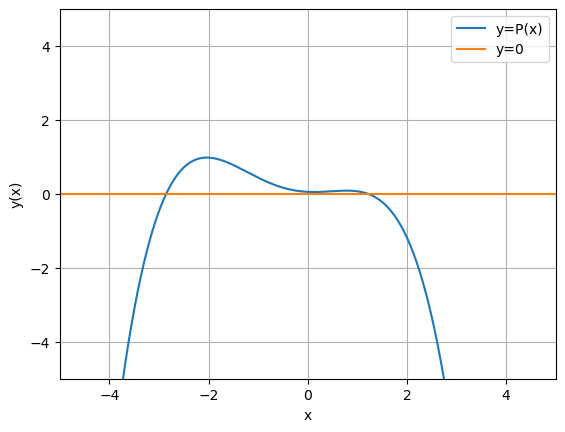

In [36]:
x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots()
ax.plot(x, P(coef, x), label='y=P(x)')
ax.plot(x, 0*x, label='y=0')
ax.set_xlim(-5,5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Из графика следует, что, так как уравнение имеет всего 2 корня, то искомый наибольший по модулю корень находится на отрезке $[-4; -2]$. Сузим этот отрезок с помощью дихотомии.

In [37]:
a = -4
b = -2
eps = 1e-1

table_list = [[a, b, b - a, P(coef, a), P(coef, b) , (a + b)/2]]
c = 0
while b - a > eps:
    c = (a+b)/2
    if P(coef, c)*P(coef, a) >= 0:
        a = c
    else:
        b = c
    table_list.append([a, b, b - a, P(coef, a), P(coef, b) , (a + b)/2])
pd.DataFrame(table_list, columns = ['a', 'b', 'b-a', 'f(a)', 'f(b)', '(a+b)/2'])

,a,b,b-a,f(a),f(b),(a+b)/2
0,-4.000,-2.0000,2.0000,-7.965210,0.982300,-3.00000
1,-3.000,-2.0000,1.0000,-0.466450,0.982300,-2.50000
2,-3.000,-2.5000,0.5000,-0.466450,0.715747,-2.75000
3,-3.000,-2.7500,0.2500,-0.466450,0.271747,-2.87500
4,-2.875,-2.7500,0.1250,-0.056089,0.271747,-2.81250
5,-2.875,-2.8125,0.0625,-0.056089,0.117565,-2.84375


Получили отрезок $[-2.875; -2.8125]$, на котором находится искомый корень. По графику видно, что корень в этом отрезке должен быть единственным и функция на этом отрезке монотонно возрастает (так как второй корень из двух имеющихся является положительным, т.е. никак не может оказаться на этом отрезке).

## Отыскание приближенного значения корня

Для приближения значения корня воспользуемся методом Ньютона. Проверим все условия для сходимости метода:

Также зададим функции первой и второй производной многочлена, поскольку они понадобится в этом методе.

In [38]:
def P_(a, x):
    P = 0
    for i in range(1, len(a)):
        P += i*x**(i-1) * a[i]
    return P

In [39]:
def P__(a, x):
    P = 0
    for i in range(2, len(a)):
        P += i*(i-1)*x**(i-2) * a[i]
    return P

In [40]:
x_0 = (a+b)/2
print('x_0 =', x_0) 
h_0 = - P(coef, x_0) / P_(coef, x_0)
print('h_0 =', h_0) 
s_0 = np.linspace(x_0, x_0 + 2*h_0, 1000)
print('s_0 = [', s_0[0], ';', s_0[-1], ']')

x_0 = -2.84375
h_0 = -0.011968030327013178
s_0 = [ -2.84375 ; -2.867686060654026 ]


Функция $P(x)$ определена и дважды непрерывно дифференцируема на отрезке $s_0$. Также

In [41]:
P(coef,s_0[0])*P_(coef,s_0[0])

0.09234071309797807

In [42]:
P(coef,s_0[-1])*P_(coef,s_0[-1])

-0.10076505717125879

In [43]:
M = np.max(np.absolute(P__(coef,s_0)))
M

5.244257130515324

In [44]:
2*np.absolute(h_0)*M <= np.absolute(P_(coef, x_0))

True

Все необходимые условия сходимости выполнены. Зададим точность для метода и реализуем итерационный процесс.

In [45]:
epsilon = 1e-6

In [46]:
def phi(x):
    return x - P(coef, x) / P_(coef, x)

In [47]:
x_k = x_0
x_k1 = phi(x_0)
print(x_k1)
k = 1
while np.absolute(x_k1 - x_k) >= epsilon:
    x_k = x_k1
    x_k1 = phi(x_k)
    k+=1
    print(x_k1)
print('Число итераций:', k)

-2.8557180303270133
-2.855588144333177
-2.855588128919784
Число итераций: 3


Покажем с помощью подстановки, что найденный приближенный корень действительно является корнем данного многочлена:

In [48]:
P(coef, x_k1)

-8.881784197001252e-16

## Вывод
Таким образом, мы смогли найти наибольший по модулю корень для многочлена с точностью $10^{-6}$, и он равен $$x\approx-2.855588.$$